In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
h = 1 #mean
sd =1
n = 50

#generates two cicular distributions centered at -h and h

def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return(x1, y1, x2, y2)


In [67]:
(x1, y1, x2, y2) = gen_data(50,1,1,1.5)

In [68]:
(x1, y1, x2, y2) = gen_data(1000,1.5,1,2)

In [69]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1,y1,"o", ms =2)
    plt.plot(x2,y2,"o", ms =2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")


<IPython.core.display.Javascript object>


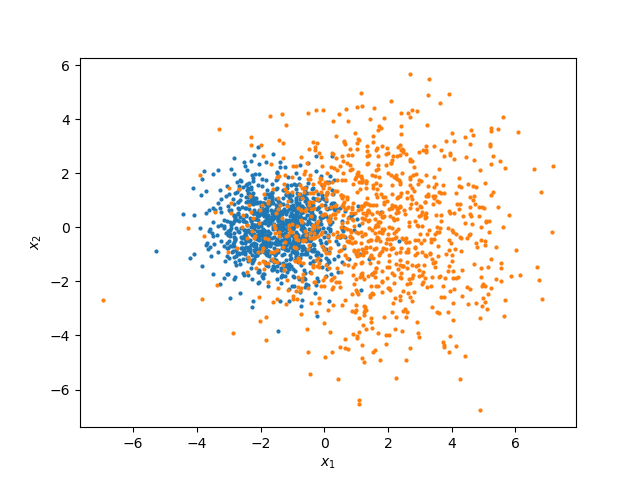

In [70]:
plot_data(x1, y1, x2, y2)

In [72]:
 def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p) 

In [73]:
prob_to_odds(0.8)

4.000000000000001

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
#classigfier object
clf = LogisticRegression()

In [76]:
#combine xs and ys for sklearn LogisticRegression
#has shape as:
#x1 y1
#x2 y2

X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [77]:
X.shape

(2000, 2)

In [78]:
#generate outcome vector, Y
n = 1000
y = np.hstack((np.repeat(1, n), np.repeat(2,n)))

In [79]:
y.shape

(2000,)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [81]:
y_train.shape

(1000,)

In [84]:
#trains logistic regression object model
clf.fit(X_train,y_train)

LogisticRegression()

In [85]:
#computes accuraccy of model, training data vs test data
clf.score(X_test, y_test)

0.856

In [87]:
#gives probabilities of predictions / chance of assigning to class
clf.predict_proba(np.array([-2, 0]).reshape(1,-1))
#returns a list [p1, p2]. p1 = prob of belonging to class 1, p2=prob of class 2

array([[0.89398026, 0.10601974]])

In [91]:
#makes prediction
clf.predict(np.array([-2, 0]).reshape(1,-1))

array([1])

In [ ]:
#Computing predictive probabilities across the grid
#compute probailities at every point on x-y grid

#np.meshgrid returns 2 matricies, 1 is X1 coords, 2 is X2 coords
#xx1, xx2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5,5,0.1))

#ravel function takes all rows  of a matrix, and returns one long vector
